In [1]:
from allClassifiers import preprocessDataset, trainClassifiers

/home/mohit/.conda/envs/fairness/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset='compas'
train_dataset, test_dataset = preprocessDataset(f'/media/data_dump/Mohit/neurips2022_data/{dataset}/raw/betaDatasets/imbalance_0.5_1.0', f'/media/data_dump/Mohit/neurips2022_data/{dataset}/raw/original_test.csv', dataset)

In [3]:
results = trainClassifiers(train_dataset, test_dataset, dataset)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logi

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the doc

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the doc

In [90]:
results

{'base': {'lr': <aif360.metrics.classification_metric.ClassificationMetric at 0x7fa782f11390>},
 'pre': {'rew': <aif360.metrics.classification_metric.ClassificationMetric at 0x7fa789c268d0>},
 'in': {'gerry_eo': <aif360.metrics.classification_metric.ClassificationMetric at 0x7fa82032e4e0>,
  'meta_fair_dp': <aif360.metrics.classification_metric.ClassificationMetric at 0x7fa77bd1c438>,
  'meta_fair_eo': <aif360.metrics.classification_metric.ClassificationMetric at 0x7fa77bd1c048>,
  'prej_remover': <aif360.metrics.classification_metric.ClassificationMetric at 0x7fa820304668>,
  'exp_grad_dp': <aif360.metrics.classification_metric.ClassificationMetric at 0x7fa782f11320>,
  'exp_grad_eo': <aif360.metrics.classification_metric.ClassificationMetric at 0x7fa77c24eb00>},
 'post': {'eq': <aif360.metrics.classification_metric.ClassificationMetric at 0x7fa780ae3cc0>,
  'cal_eq': <aif360.metrics.classification_metric.ClassificationMetric at 0x7fa780ae3f60>,
  'reject': <aif360.metrics.classificat

In [ ]:
def get_distortion_adult(vold, vnew):
    return None

### Results analysis

In [1]:
import matplotlib.pyplot as plt
import pickle

In [2]:
dataset='adult'
with open(f'/media/data_dump/Mohit/neurips2022_data/results/{dataset}_LR_multipleTestSets_results.pkl', 'rb') as f:
    results = pickle.load(f)

/home/mohit/.conda/envs/fairness/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
def plotResults(static_var, variable_var, value, metric='eod', omit_plots=['gerry_eo', 'meta_fair_dp', 'meta_fair_eo'], only_plots=['lr', 'rew', 'exp_grad_eo', 'cal_eq']):
    if static_var == 'beta_pos':
        stableIndex = 1
        variableIndex = 2
    else:
        stableIndex = 2
        variableIndex = 1
    results_subsample = {}
    for i in results:
        temp = i.split('_')
        if temp[stableIndex] == value:
            results_subsample[float(temp[variableIndex])] = results[i]
    finalResultDict = {}
    for i in sorted(results_subsample.keys()):
        for j in results_subsample[i]:
            for k in results_subsample[i][j]:
                if k not in finalResultDict:
                    finalResultDict[k] = []
                if metric == 'eod':
                    finalResultDict[k].append(abs(results_subsample[i][j][k].equal_opportunity_difference()))
                elif metric == 'acc':
                    finalResultDict[k].append(abs(results_subsample[i][j][k].accuracy()))
                elif metric == 'dp':
                    finalResultDict[k].append(abs(results_subsample[i][j][k].statistical_parity_difference()))
    plt.figure(figsize=(10,6))
    plt.title(f'{dataset}: {variable_var} variable, {static_var} fixed at {value}')
    for i in finalResultDict:
        if i not in omit_plots:
            if i in only_plots:
                plt.plot(sorted(results_subsample.keys()), finalResultDict[i], label=i)
    plt.xlabel(f'Imbalance on {variable_var}')
    plt.ylabel(metric)
    plt.legend(bbox_to_anchor=(1,1))

In [67]:
def plotResults_multipleTestSets(static_var, variable_var, value, metric='eod', only_plots=['lr', 'rew', 'exp_grad_dp', 'exp_grad_eo', 'eq', 'cal_eq', 'reject']):
    if static_var == 'beta_pos':
        stableIndex = 1
        variableIndex = 2
    else:
        stableIndex = 2
        variableIndex = 1
    results_subsample = {}
    for i in results:
        temp = i.split('_')
        if temp[stableIndex] == value:
            results_subsample[float(temp[variableIndex])] = results[i]
    perTestSetResults = {}
    for testSet in ['balanced', 'biased', 'original']:
        finalResultDict = {}
        for i in sorted(results_subsample.keys()):
            for j in results_subsample[i][testSet]:
                for k in results_subsample[i][testSet][j]:
                    if k not in finalResultDict:
                        finalResultDict[k] = []
                    if metric == 'eod':
                        finalResultDict[k].append(abs(results_subsample[i][testSet][j][k].equal_opportunity_difference()))
                    elif metric == 'acc':
                        finalResultDict[k].append(abs(results_subsample[i][testSet][j][k].accuracy()))
                    elif metric == 'dp':
                        finalResultDict[k].append(abs(results_subsample[i][testSet][j][k].statistical_parity_difference()))
        perTestSetResults[testSet] = finalResultDict
    plt.figure(figsize=(10,6))
    plt.title(f'{dataset}: {variable_var} variable, {static_var} fixed at {value}')
    for testSet in perTestSetResults:
        finalResultDict = perTestSetResults[testSet]
        for i in finalResultDict:
            if i in only_plots:
                    plt.plot(sorted(results_subsample.keys()), finalResultDict[i], label=f'{i}_{testSet}')
    plt.xlabel(f'Imbalance on {variable_var}')
    plt.ylabel(metric)
    plt.legend(bbox_to_anchor=(1,1))

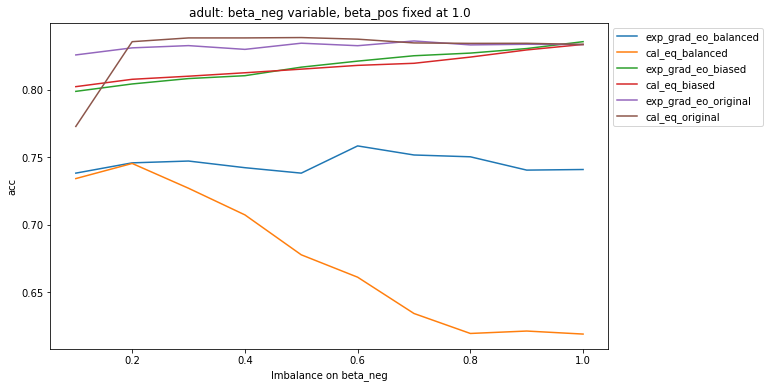

In [83]:
# ['lr', 'rew', 'prej_remover', 'exp_grad_dp', 'exp_grad_eo', 'eq', 'cal_eq', 'reject']
static_var = 'beta_pos'
variable_var = 'beta_neg'
only_plots = ['exp_grad_eo', 'cal_eq']
plotResults_multipleTestSets(static_var=static_var, variable_var=variable_var, value='1.0', metric='acc', only_plots=only_plots)

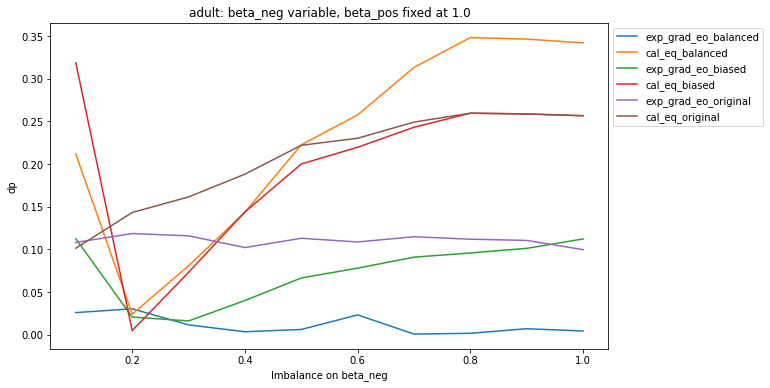

In [84]:
#plotResults(static_var='beta_pos', variable_var='beta_neg', value='1.0', metric='acc')
plotResults_multipleTestSets(static_var=static_var, variable_var=variable_var, value='1.0', metric='dp', only_plots=only_plots)

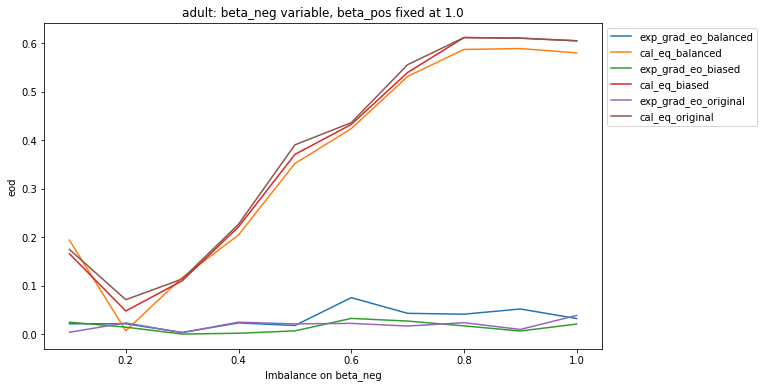

In [85]:
plotResults_multipleTestSets(static_var=static_var, variable_var=variable_var, value='1.0', metric='eod', only_plots=only_plots)